<a href="https://colab.research.google.com/github/singhankit67/Template-Matching/blob/master/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import collections
import time
import glob
import hashlib
import os
from google.colab.patches import cv2_imshow

crops/0cb65276-fcb6-5828-b2cc-7fd927b6201e.jpg
crops/0fe08270-1e6f-5d39-8685-9a122f79e25d.jpg
crops/1eca1e8e-f6b0-5c6f-af82-0bf8910d8883.jpg
crops/0c8829b6-0b89-5994-8b64-e09cfcda8c87.jpg
crops/02c10f68-4bc4-589a-96b1-89562544cba7.jpg
crops/WhatsApp Image 2020-03-14 at 10.55.20.jpeg
crops/1b2089bc-333e-5477-8667-90d6cb100c22.jpg
crops/1aeb8b7d-53bd-526e-bb7a-1cdb12bd83a1.jpg


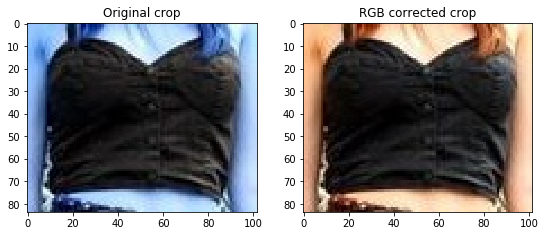

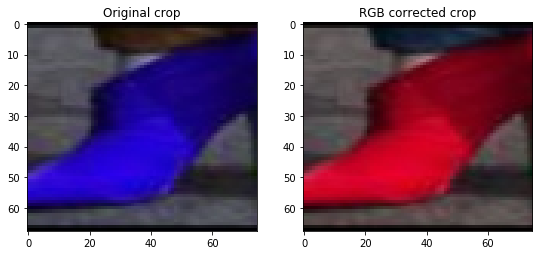

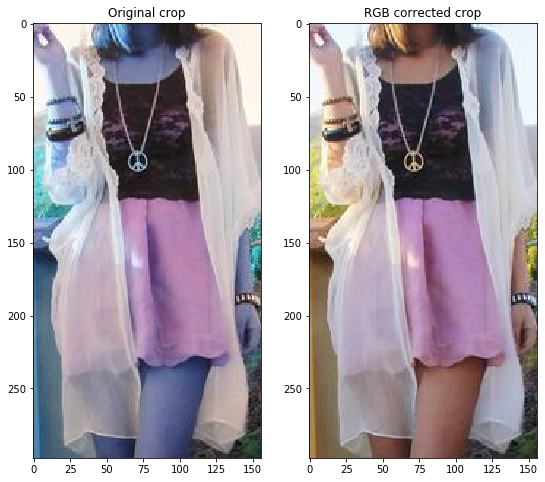

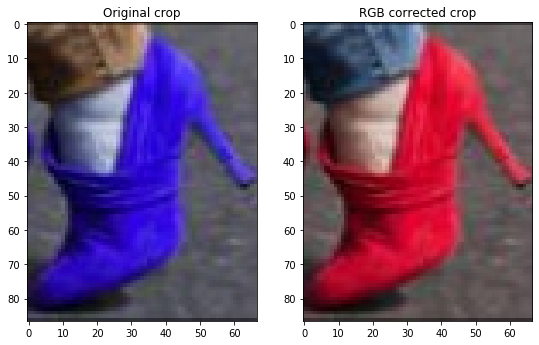

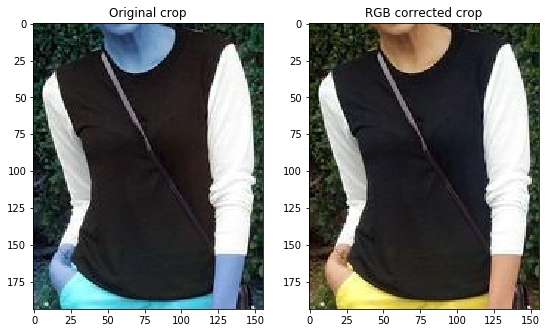

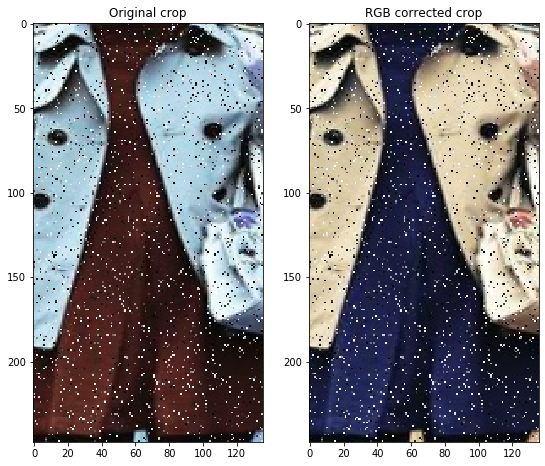

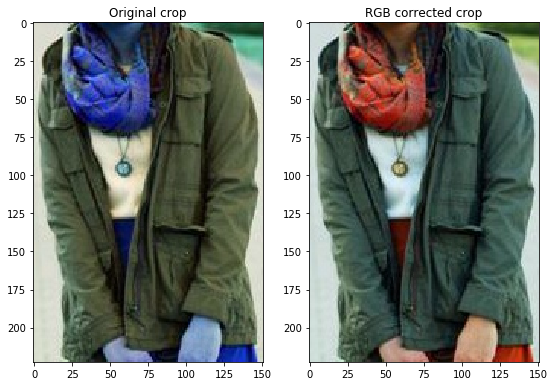

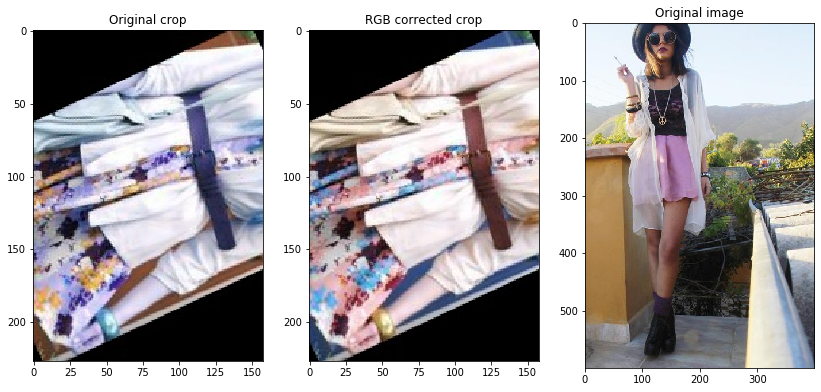

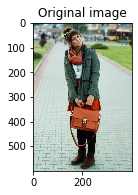

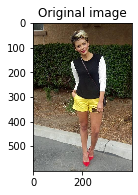

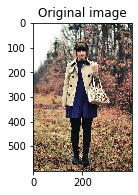

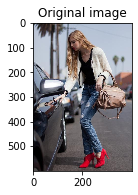

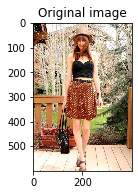

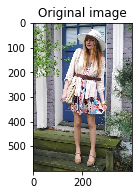

In [0]:
crp_dir = "crops" # Enter Directory of all images 
img_dir = "images"
data_path = os.path.join(crp_dir,'*g')
data_path1 = os.path.join(img_dir,'*g')

files = glob.glob(data_path)
files1 = glob.glob(data_path1)


crp_list = []
src_list = []
for f1 in files:
    img = cv2.imread(f1)
    img1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14,8))
    plt.subplot(131)
    plt.title("Original crop")
    plt.imshow(img)
    plt.subplot(132)
    plt.title("RGB corrected crop")
    plt.imshow(img1)
    crp_list.append(img1)
    print(f1) 

for f2 in files1:
    src = cv2.imread(f2)
    src1 = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
    plt.subplot(133)
    plt.title("Original image")
    plt.imshow(src1)
    src_list.append(src1)
    plt.show()    

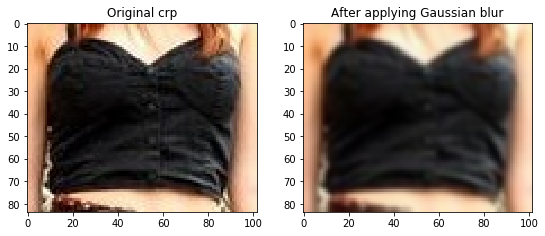

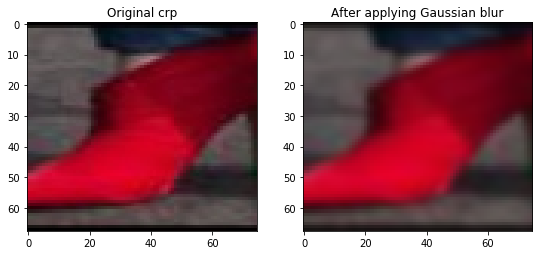

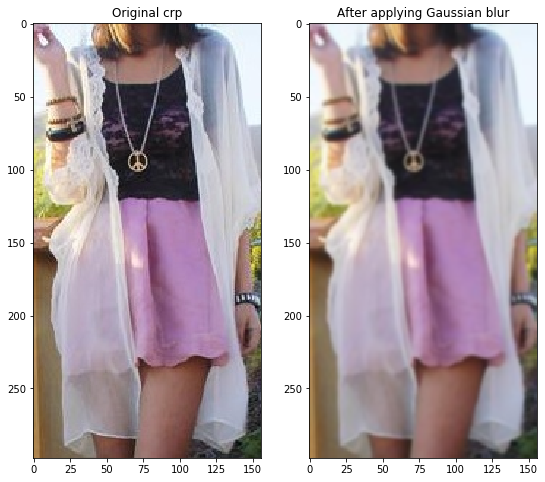

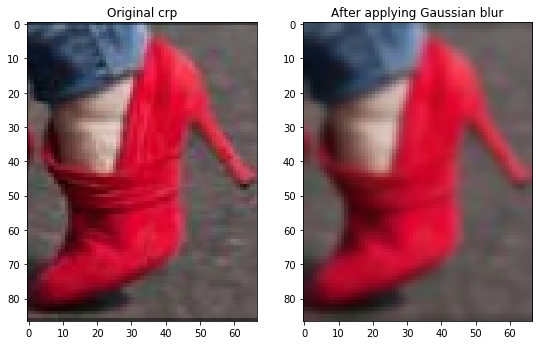

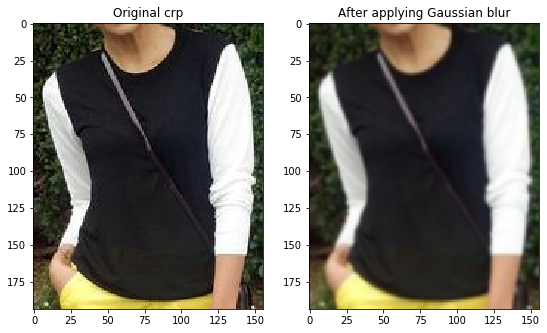

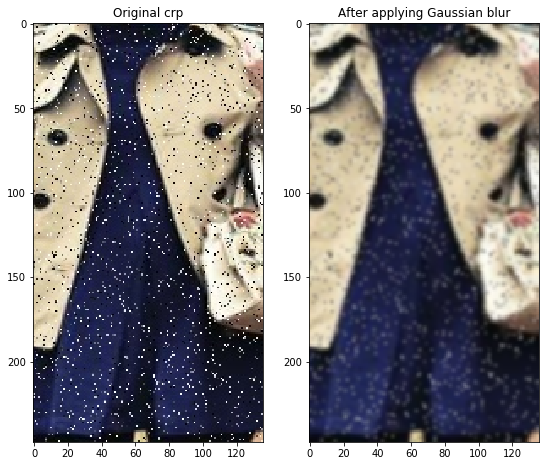

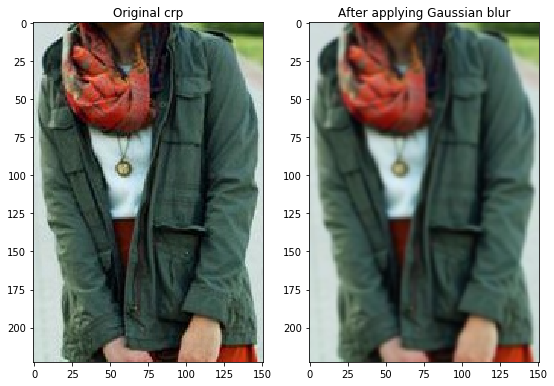

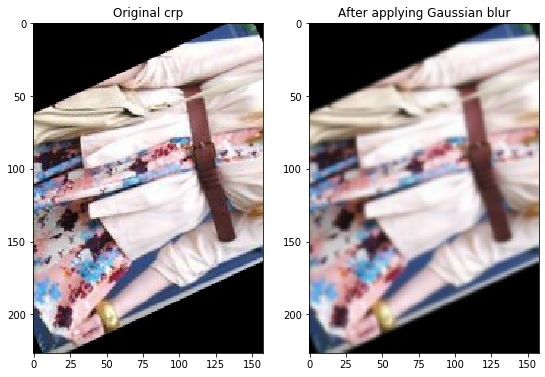

In [0]:
crp_ef = []
for e1 in crp_list:
    crp_g = cv2.GaussianBlur(e1,(5,5),0)
    plt.figure(figsize=(14,8))
    plt.subplot(131)
    plt.title("Original crp")
    plt.imshow(e1)
    plt.subplot(132)
    plt.title("After applying Gaussian blur")
    plt.imshow(crp_g)
    crp_ef.append(crp_g)

plt.show()

[0.987105131149292, 0.9909555315971375, 0.9894201159477234, 0.6135305762290955, 0.8520025014877319, 0.9882749915122986, 0.5793405771255493]


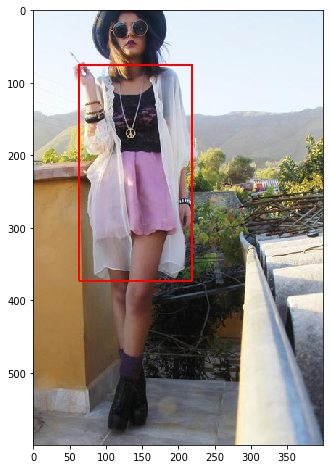

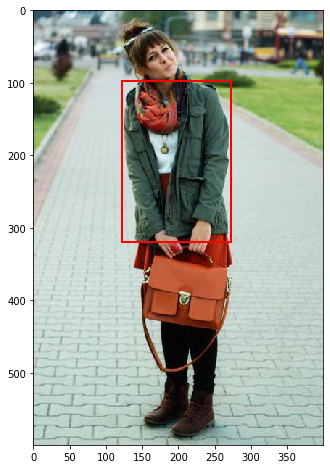

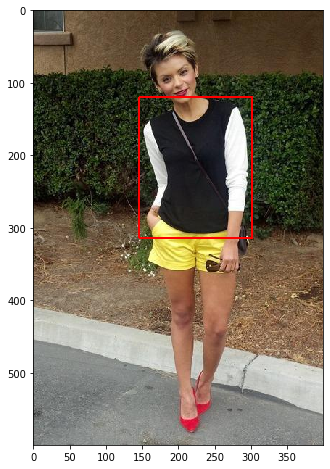

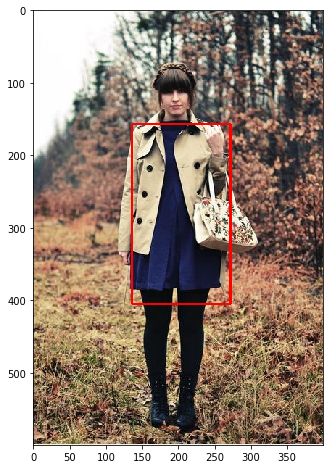

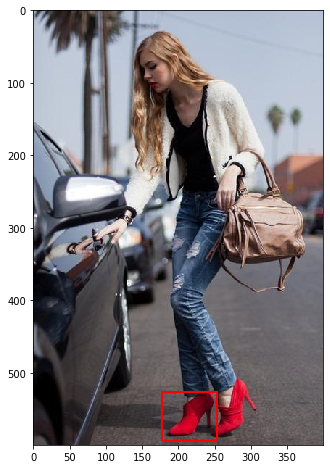

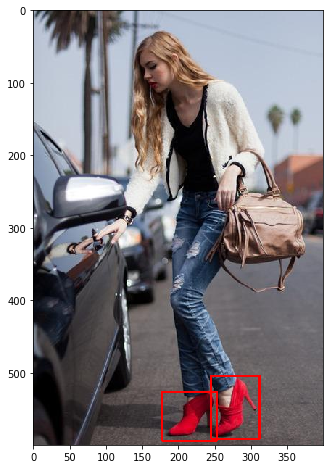

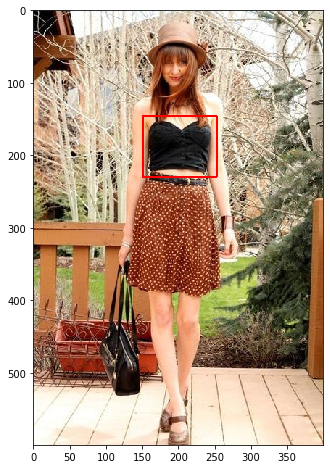

In [0]:
result1 = []
count = 0
acc = []
for e3 in src_list:
    Accuracy_val = []
    for e2 in crp_ef:
        count = count + 1
        result = cv2.matchTemplate(e3,e2,cv2.TM_CCOEFF_NORMED)
        result1.append(result)
        _, max_val, _, max_loc = cv2.minMaxLoc(result)
        # print("Maxmimum match: ",max_val)
        Accuracy_val.append(max_val)
        # if (count == len(crp_ef)):
        #     acc.append(max(Accuracy_val))
        #plt.title("Resulting array")
        #plt.imshow(result,cmap='gray')
        if (max_val>=0.61):
            top_left = max_loc
            h,w = e2.shape[:2]
            bottom_right = (max_loc[0]+w , max_loc[1]+h)            
            plt.figure(figsize=(14,8))
            cv2.rectangle(e3,top_left,bottom_right,255,2)
            plt.imshow(e3)
            
    # print(Accuracy_val)
    acc.append(max(Accuracy_val))
    
print(acc) 
 



In [0]:
total_acc = 0
for i in acc:
    total_acc = total_acc + i

print(total_acc/len(acc))


# img10 = cv2.imread('crops/1aeb8b7d-53bd-526e-bb7a-1cdb12bd83a1.jpg', 0)          # query Image
# img20 = cv2.imread('images/0ac558b5-7767-54e0-a33d-921b43a81738.jpg',0)  # target Image

# # Initiate SIFT detector
# orb = cv2.ORB_create()

# # find the keypoints and descriptors with ORB
# kp1, des1 = orb.detectAndCompute(img10,None)
# kp2, des2 = orb.detectAndCompute(img20,None)

# # create BFMatcher object
# bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# # Match descriptors.
# matches = bf.match(des1,des2)

# # Sort them in the order of their distance.
# matches = sorted(matches, key = lambda x:x.distance)

# good_matches = matches[:10]


# src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
# dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
# M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
# matchesMask = mask.ravel().tolist()
# h1,w1 = img10.shape[:2]
# pts = np.float32([ [0,0],[0,h1-1],[w1-1,h1-1],[w1-1,0] ]).reshape(-1,1,2)

# dst = cv2.perspectiveTransform(pts,M)
# dst += (w1, 0)  # adding offset

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                singlePointColor = None,
#                matchesMask = matchesMask, # draw only inliers
#                flags = 2)

# img30 = cv2.drawMatches(img10,kp1,img20,kp2,good_matches, None,**draw_params)

# # Draw bounding box in Red
# img30 = cv2.polylines(img30, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)

# cv2_imshow(img30)
# cv2.waitKey()
# # or another option for display output
# #plt.imshow(img3, 'result'), plt.show()

0.8572327750069755


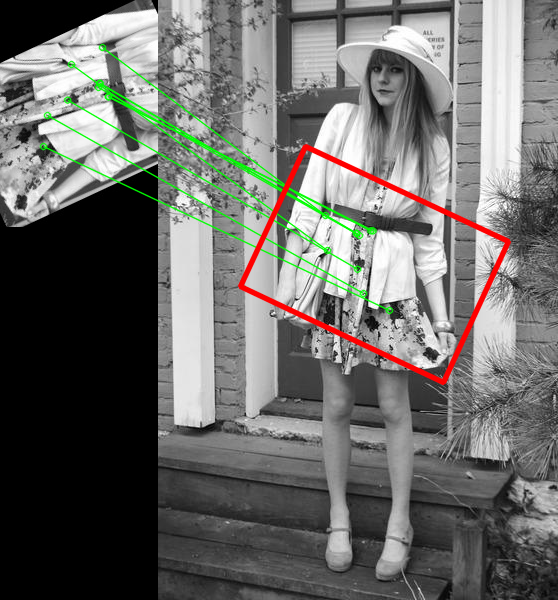

-1

In [0]:

img1 = cv2.imread('crops/1aeb8b7d-53bd-526e-bb7a-1cdb12bd83a1.jpg', 0)          
img2 = cv2.imread('images/0ac558b5-7767-54e0-a33d-921b43a81738.jpg',0)  
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
good_matches = matches[:10]
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches     ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
matchesMask = mask.ravel().tolist()
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
dst += (w, 0)
draw_params = dict(matchColor = (0,255,0), 
               singlePointColor = None,
               matchesMask = matchesMask, 
               flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None,**draw_params)
img3 = cv2.polylines(img3, [np.int32(dst)], True, (0,0,255),3, cv2.LINE_AA)
cv2_imshow(img3)

cv2.waitKey()